In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import pyaldata as pyd
import scipy
from utils import *

# Load and process data

In [70]:
dataset = 'M030_2024_04_11_17_00'
mouse_id = 'M030'

In [71]:
data_dir = '/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'
fname = os.path.join(data_dir, dataset+'_pyaldata.mat')

In [72]:
df = pyd.mat2dataframe(fname, shift_idx_fields=False, td_name='df')

df['bin_size'] = 0.01

df = pyd.remove_low_firing_neurons(df, "m1_spikes",  1)
df = pyd.remove_low_firing_neurons(df, "s1_spikes", 1)
df = pyd.remove_low_firing_neurons(df, "str_motor_spikes",  1)
df = pyd.remove_low_firing_neurons(df, "str_sensor_spikes", 1)

df = pyd.transform_signal(df, "m1_spikes",  'sqrt')
df = pyd.transform_signal(df, "s1_spikes", 'sqrt')
df = pyd.transform_signal(df, "str_motor_spikes",  'sqrt')
df = pyd.transform_signal(df, "str_sensor_spikes", 'sqrt')

df = pyd.add_firing_rates(df,'smooth')

/home/cf620/miniconda3/envs/quake/lib/python3.12/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


field sol_nb could not be converted to int.


/home/cf620/git/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/cf620/git/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/cf620/git/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/cf620/git/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


In [73]:
from sklearn.decomposition import PCA, FactorAnalysis

pca_dims = 15

df = pyd.dim_reduce(df, PCA(pca_dims), "m1_rates", "m1_pca")
df = pyd.dim_reduce(df, PCA(pca_dims), "s1_rates", "s1_pca")
df = pyd.dim_reduce(df, PCA(pca_dims), "str_motor_rates", "str_motor_pca")
df = pyd.dim_reduce(df, PCA(pca_dims), "str_sensor_rates", "str_sensor_pca")


In [74]:
df.head()

,trial_id,event_time,sol_nb,sol_direction,perturbation_bin,trialType,m1_spikes,str_motor_spikes,s1_spikes,str_sensor_spikes,...,right_ankle_angle,bin_size,m1_rates,str_motor_rates,s1_rates,str_sensor_rates,m1_pca,s1_pca,str_motor_pca,str_sensor_pca
0,0,NaN,NaN,NaN,NaN,spontaneous,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[72.74835012342656, 71.78436470548883, 68.3118...",0.01,"[[3.9026704, 0.0, 0.0, 0.0, 0.0, 0.0, 0.153502...","[[3.9026704, 0.0, 0.0, 0.0, 0.0, 0.0, 0.153502...","[[0.7749599, 4.8779242e-05, 0.0, 0.021426776, ...","[[0.7749599, 4.8779242e-05, 0.0, 0.021426776, ...","[[-43.853325, -10.94034, 8.586567, 10.216932, ...","[[-47.893482, -32.776215, 14.649472, -53.57423...","[[-43.853317, -10.940318, 8.586619, 10.216478,...","[[-47.89348, -32.776207, 14.649741, -53.574085..."
1,1,610009.0,3,120.0,100.0,perturbation,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[65.98583366343536, 61.79442781260724, 61.3410...",0.01,"[[15.566815, 0.04294701, 0.0, 0.0, 0.0, 0.0, 0...","[[15.566815, 0.04294701, 0.0, 0.0, 0.0, 0.0, 0...","[[0.0, 5.3083563, 0.0, 0.00089810096, 0.0, 0.0...","[[0.0, 5.3083563, 0.0, 0.00089810096, 0.0, 0.0...","[[-18.18366, 21.294035, 10.290906, 1.0587507, ...","[[-51.54921, -6.2590766, -15.951985, -9.496798...","[[-18.183643, 21.29405, 10.290831, 1.0594907, ...","[[-51.549194, -6.259088, -15.951959, -9.496444..."
2,2,613653.0,0,300.0,100.0,perturbation,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.414213562373...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.414213562373...",...,"[65.9008305225721, 64.34191817274042, 62.99088...",0.01,"[[0.043315463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[[0.043315463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[[0.0, 0.0, 0.0, 3.9133196, 0.00089810096, 17....","[[0.0, 0.0, 0.0, 3.9133196, 0.00089810096, 17....","[[-35.842373, 6.6441913, -20.350786, -31.15398...","[[-53.715027, -31.349398, -14.281283, -1.03606...","[[-35.842392, 6.6441827, -20.35065, -31.154627...","[[-53.715015, -31.349403, -14.281248, -1.03630..."
3,3,618823.0,3,120.0,100.0,perturbation,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[103.39504868573208, 111.39868713787958, 117.1...",0.01,"[[20.290827, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[20.290827, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[0.004743816, 1.8788582, 0.0, 14.980414, 0.0,...","[[0.004743816, 1.8788582, 0.0, 14.980414, 0.0,...","[[-30.02847, -17.43927, -2.481399, -4.0108705,...","[[-40.49335, -5.9255667, -4.122155, 10.827162,...","[[-30.028475, -17.439257, -2.481328, -4.011314...","[[-40.49335, -5.9255652, -4.122208, 10.827011,..."
4,4,629823.0,1,240.0,100.0,perturbation,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,...",...,"[63.61514624839134, 60.75923176942048, 66.3247...",0.01,"[[0.0, 5.582239, 0.0, 0.0, 0.0, 0.0, 0.0, 12.3...","[[0.0, 5.582239, 0.0, 0.0, 0.0, 0.0, 0.0, 12.3...","[[0.0, 0.0, 0.0, 0.0, 12.445808, 0.0, 25.65098...","[[0.0, 0.0, 0.0, 0.0, 12.445808, 0.0, 25.65098...","[[-41.994114, 29.527905, 4.376687, 4.1336846, ...","[[-33.35489, 104.92545, 70.22645, -16.13774, 7...","[[-41.9941, 29.527893, 4.376603, 4.1340423, -3...","[[-33.354862, 104.92552, 70.22646, -16.137459,..."


### Turn perturbations from angles to left to right

In [75]:
# Function to classify angles
def classify_angle(angle):
    if 90 <= angle <= 270:
        return 'left'
    else:
        return 'right'

# Apply the function to the angle column
df['side'] = df['sol_direction'].apply(classify_angle)

### Turn perturbations from angles to front and back 

In [76]:
# Function to classify angles
def classify_angle(angle):
    if 0 < angle < 180:
        return 'front'
    if 180 < angle < 360:
        return 'back'
    else:
        return 'side'

# Apply the function to the angle column
df['side_hem'] = df['sol_direction'].apply(classify_angle)

In [77]:
df.head()

,trial_id,event_time,sol_nb,sol_direction,perturbation_bin,trialType,m1_spikes,str_motor_spikes,s1_spikes,str_sensor_spikes,...,m1_rates,str_motor_rates,s1_rates,str_sensor_rates,m1_pca,s1_pca,str_motor_pca,str_sensor_pca,side,side_hem
0,0,NaN,NaN,NaN,NaN,spontaneous,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[[3.9026704, 0.0, 0.0, 0.0, 0.0, 0.0, 0.153502...","[[3.9026704, 0.0, 0.0, 0.0, 0.0, 0.0, 0.153502...","[[0.7749599, 4.8779242e-05, 0.0, 0.021426776, ...","[[0.7749599, 4.8779242e-05, 0.0, 0.021426776, ...","[[-43.853325, -10.94034, 8.586567, 10.216932, ...","[[-47.893482, -32.776215, 14.649472, -53.57423...","[[-43.853317, -10.940318, 8.586619, 10.216478,...","[[-47.89348, -32.776207, 14.649741, -53.574085...",right,side
1,1,610009.0,3,120.0,100.0,perturbation,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[[15.566815, 0.04294701, 0.0, 0.0, 0.0, 0.0, 0...","[[15.566815, 0.04294701, 0.0, 0.0, 0.0, 0.0, 0...","[[0.0, 5.3083563, 0.0, 0.00089810096, 0.0, 0.0...","[[0.0, 5.3083563, 0.0, 0.00089810096, 0.0, 0.0...","[[-18.18366, 21.294035, 10.290906, 1.0587507, ...","[[-51.54921, -6.2590766, -15.951985, -9.496798...","[[-18.183643, 21.29405, 10.290831, 1.0594907, ...","[[-51.549194, -6.259088, -15.951959, -9.496444...",left,front
2,2,613653.0,0,300.0,100.0,perturbation,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.414213562373...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.414213562373...",...,"[[0.043315463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[[0.043315463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[[0.0, 0.0, 0.0, 3.9133196, 0.00089810096, 17....","[[0.0, 0.0, 0.0, 3.9133196, 0.00089810096, 17....","[[-35.842373, 6.6441913, -20.350786, -31.15398...","[[-53.715027, -31.349398, -14.281283, -1.03606...","[[-35.842392, 6.6441827, -20.35065, -31.154627...","[[-53.715015, -31.349403, -14.281248, -1.03630...",right,back
3,3,618823.0,3,120.0,100.0,perturbation,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[[20.290827, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[20.290827, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[0.004743816, 1.8788582, 0.0, 14.980414, 0.0,...","[[0.004743816, 1.8788582, 0.0, 14.980414, 0.0,...","[[-30.02847, -17.43927, -2.481399, -4.0108705,...","[[-40.49335, -5.9255667, -4.122155, 10.827162,...","[[-30.028475, -17.439257, -2.481328, -4.011314...","[[-40.49335, -5.9255652, -4.122208, 10.827011,...",left,front
4,4,629823.0,1,240.0,100.0,perturbation,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,...",...,"[[0.0, 5.582239, 0.0, 0.0, 0.0, 0.0, 0.0, 12.3...","[[0.0, 5.582239, 0.0, 0.0, 0.0, 0.0, 0.0, 12.3...","[[0.0, 0.0, 0.0, 0.0, 12.445808, 0.0, 25.65098...","[[0.0, 0.0, 0.0, 0.0, 12.445808, 0.0, 25.65098...","[[-41.994114, 29.527905, 4.376687, 4.1336846, ...","[[-33.35489, 104.92545, 70.22645, -16.13774, 7...","[[-41.9941, 29.527893, 4.376603, 4.1340423, -3...","[[-33.354862, 104.92552, 70.22646, -16.137459,...",left,back


In [78]:
# Select only perturbed trials 

df_perturbed = df[df['trialType']=='perturbation']

In [79]:
# Classify trials as left and right 

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


In [81]:
def classify_perturbation(df_perturbed, region):

    # Convert labels to binary values (left=0, right=1)
    labels_binary = np.where(df_perturbed['side'] == 'left', 0, 1)
    n_time_points = df_perturbed.loc[1,region+'_pca'].shape[0]
    n_neurons = df_perturbed.loc[1,region+'_pca'].shape[0]

    # Initialize lists to store the performance at each time point
    mean_performance_over_time = []
    std_performance_over_time = []


    # Loop over each time point
    for t in range(n_time_points):
        # Extract neural activity at time t for all trials
        X_t = np.array([trial[t, :] for trial in df_perturbed[region+'_pca']])
        
        # Initialize the classifier
        clf = SVC()
        
        # Perform cross-validation and compute the mean and std accuracy
        scores = cross_val_score(clf, X_t, labels_binary, cv=5)  # 5-fold cross-validation
        mean_accuracy = scores.mean()
        std_accuracy = scores.std()
        
        # Store the performance
        mean_performance_over_time.append(mean_accuracy)
        std_performance_over_time.append(std_accuracy)

    return mean_performance_over_time, std_performance_over_time

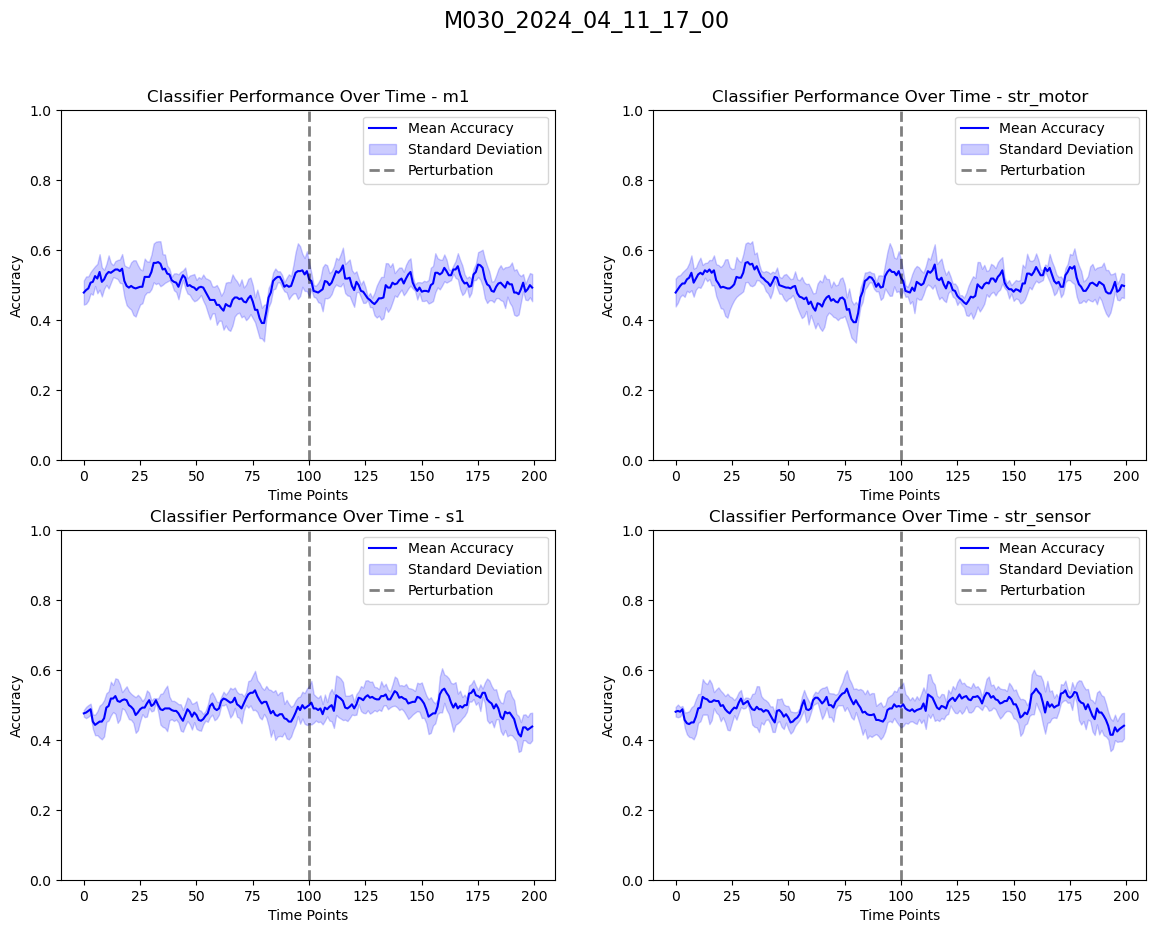

In [82]:
list_of_regions = ['m1', 'str_motor', 's1', 'str_sensor']

n_time_points=200

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs = axs.flatten()

for i,region in enumerate(list_of_regions):

    # Convert the performance lists to numpy arrays for easier plotting
    mean_performance_over_time, std_performance_over_time = classify_perturbation(df_perturbed, region)

    mean_performance_over_time = np.array(mean_performance_over_time)
    std_performance_over_time = np.array(std_performance_over_time)

    # Plot the accuracy over time with shaded standard deviation
    axs[i].plot(mean_performance_over_time, label='Mean Accuracy', color='blue')
    axs[i].fill_between(range(n_time_points), 
                    mean_performance_over_time - std_performance_over_time, 
                    mean_performance_over_time + std_performance_over_time, 
                    color='blue', alpha=0.2, label='Standard Deviation')
    axs[i].set_ylim([0,1])
    axs[i].set_xlabel('Time Points')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_title('Classifier Performance Over Time - '+ region)
    axs[i].axvline(x=100, color='black', linestyle='--', linewidth=2, alpha=0.5, label = 'Perturbation')
    axs[i].legend()

plt.suptitle(dataset, fontsize=16)

plt.savefig('./probe_analysis/classify_perturbation_side/perturbation_side_'+dataset+'.pdf')

plt.show()